In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('tech_layoffs.csv')

In [4]:
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


In [5]:
df.shape

(489, 9)

<AxesSubplot:>

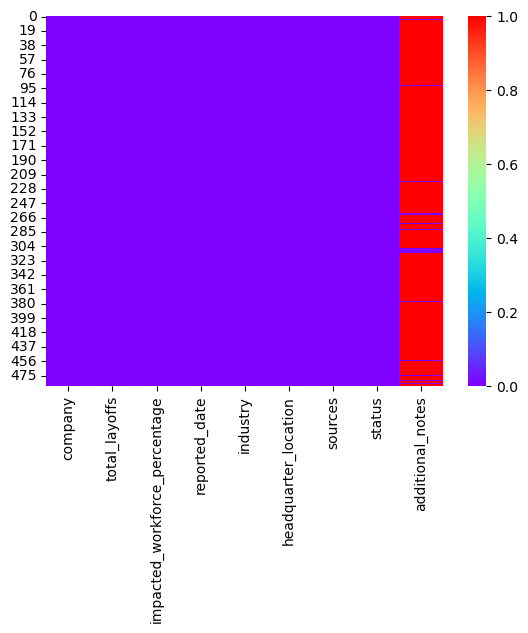

In [6]:
sns.heatmap(df.isnull(),cmap='rainbow')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB


In [8]:
df['total_layoffs'].value_counts()

Unclear    182
100         17
30          12
40          11
150          8
          ... 
111          1
5000         1
64           1
262          1
9090         1
Name: total_layoffs, Length: 150, dtype: int64

In [9]:
df['additional_notes'].isna().sum()

467

In [10]:
df['total_layoffs'].replace('Unclear',np.nan,inplace=True)

In [11]:
df.drop('additional_notes', inplace=True, axis=1)

In [12]:
df.dropna(inplace=True)

In [13]:
df['Date'] = pd.to_datetime(df['reported_date'])
df['Month'] = df['Date'].dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.strftime('%Y')

In [14]:
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,Date,Month,Year
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,2022-12-09,12,2022
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,2022-08-20,8,2022
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,2023-01-18,1,2023
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,2022-05-13,5,2022
6,Armis Security,25,4,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private,2022-12-08,12,2022


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 484
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        307 non-null    object        
 1   total_layoffs                  307 non-null    object        
 2   impacted_workforce_percentage  307 non-null    object        
 3   reported_date                  307 non-null    object        
 4   industry                       307 non-null    object        
 5   headquarter_location           307 non-null    object        
 6   sources                        307 non-null    object        
 7   status                         307 non-null    object        
 8   Date                           307 non-null    datetime64[ns]
 9   Month                          307 non-null    int64         
 10  Year                           307 non-null    object        
dtypes: datetime64[ns](1

In [16]:
df['total_layoffs'] = df['total_layoffs'].astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 484
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        307 non-null    object        
 1   total_layoffs                  307 non-null    int64         
 2   impacted_workforce_percentage  307 non-null    object        
 3   reported_date                  307 non-null    object        
 4   industry                       307 non-null    object        
 5   headquarter_location           307 non-null    object        
 6   sources                        307 non-null    object        
 7   status                         307 non-null    object        
 8   Date                           307 non-null    datetime64[ns]
 9   Month                          307 non-null    int64         
 10  Year                           307 non-null    object        
dtypes: datetime64[ns](1

In [18]:
from pandas.api.types import is_numeric_dtype

num_cols = ['impacted_workforce_percentage']
cols = df.columns
for i in cols:
    if is_numeric_dtype(df[i]) == False:
        print(i)

company
impacted_workforce_percentage
reported_date
industry
headquarter_location
sources
status
Date
Year


In [19]:
df['impacted_workforce_percentage'].replace('Unclear',np.nan,inplace=True)

In [20]:
from sklearn.impute import SimpleImputer
si =SimpleImputer()
si = SimpleImputer(missing_values=np.nan,strategy='mean')
df.iloc[:,[2]]=si.fit_transform(df.iloc[:,[2]])

In [21]:
num_cols = df.iloc[:,[2,10]]

In [22]:
num_cols = num_cols.astype('int64')

In [23]:
df['reported_date']=pd.to_datetime(df['reported_date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 484
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        307 non-null    object        
 1   total_layoffs                  307 non-null    int64         
 2   impacted_workforce_percentage  307 non-null    float64       
 3   reported_date                  307 non-null    datetime64[ns]
 4   industry                       307 non-null    object        
 5   headquarter_location           307 non-null    object        
 6   sources                        307 non-null    object        
 7   status                         307 non-null    object        
 8   Date                           307 non-null    datetime64[ns]
 9   Month                          307 non-null    int64         
 10  Year                           307 non-null    object        
dtypes: datetime64[ns](2

In [25]:
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,Date,Month,Year
0,C2FO,20,2.0,2022-12-09,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,2022-12-09,12,2022
2,Amperity,13,3.0,2022-08-20,"Saas, analytics",Seattle,Geekwire,Private,2022-08-20,8,2022
3,Addepar,20,3.0,2023-01-18,"fintech, data analytics","Mountain View, CA",Fortune,Private,2023-01-18,1,2023
4,Thirty Madison,24,3.0,2022-05-13,Health Care,New York,Axios,Private,2022-05-13,5,2022
6,Armis Security,25,4.0,2022-12-08,Cybersecurity,San Francisco,Calcalistech,Private,2022-12-08,12,2022


In [26]:
df.to_csv('Cleaned_tech_layoffs.csv')

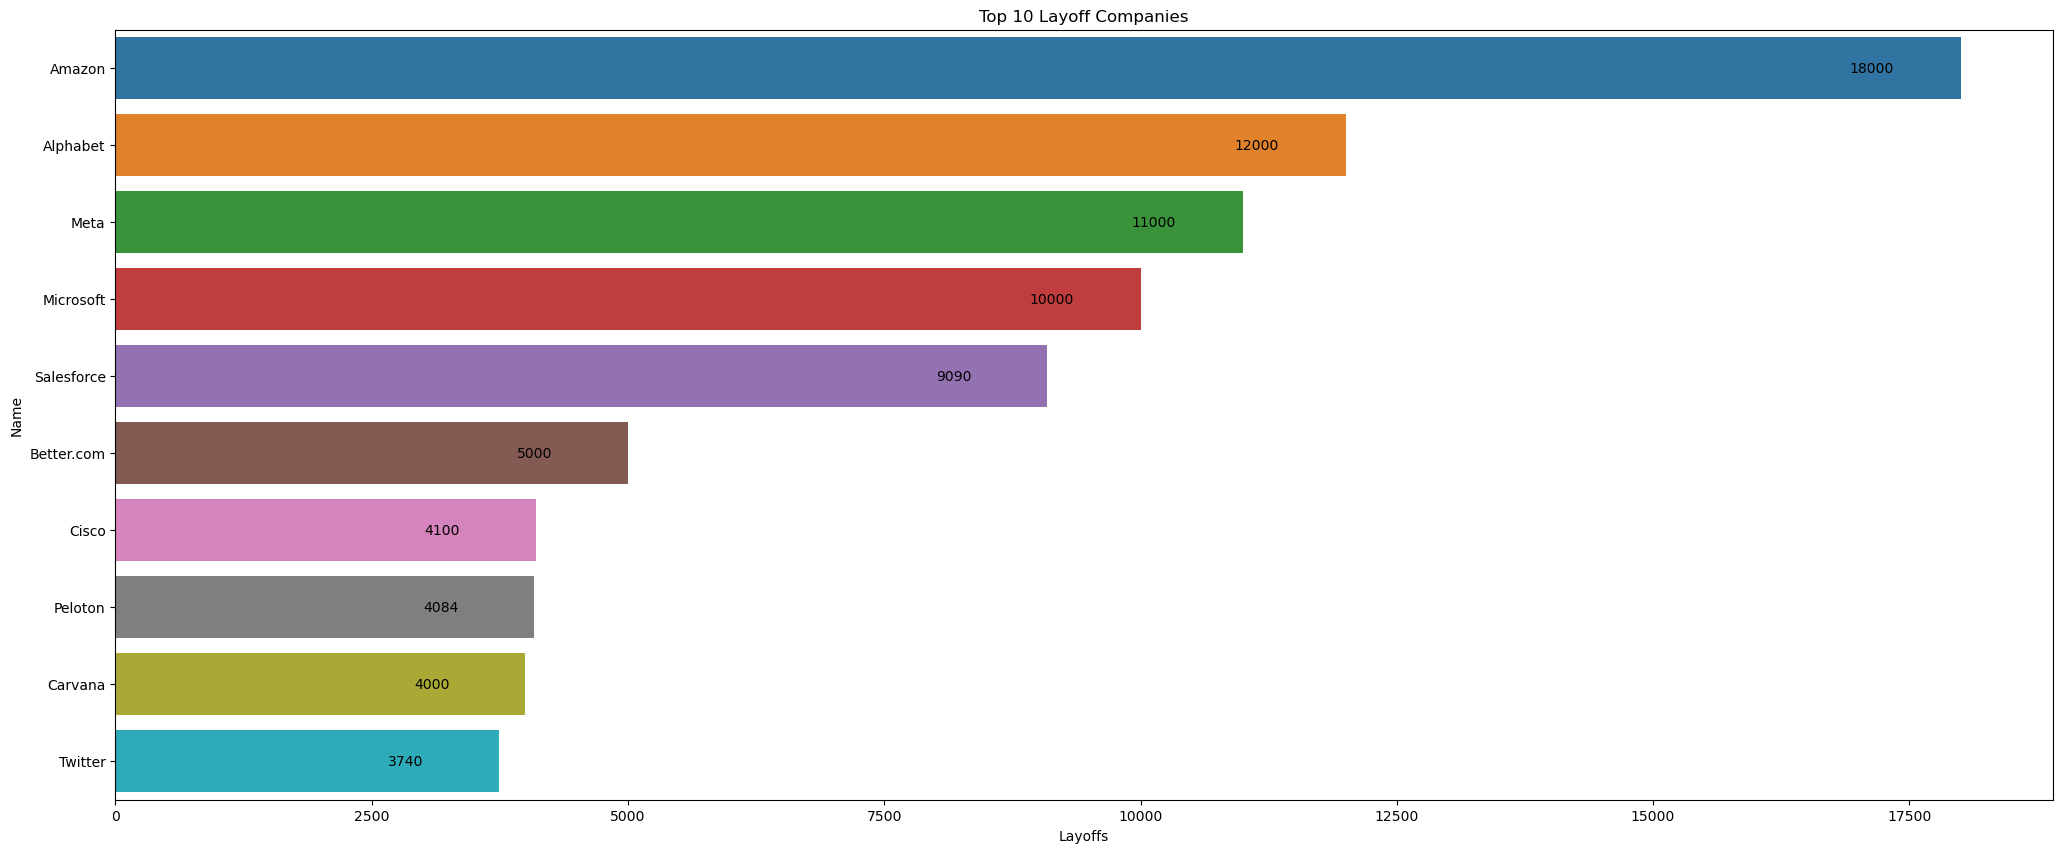

In [28]:
top_10 = df.sort_values('total_layoffs',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(25, 10))
p=sns.barplot(x="total_layoffs", y="company", data=top_10,
              ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-80)
plt.title("Top 10 Layoff Companies")
plt.xlabel('Layoffs')
plt.ylabel('Name')
plt.show()

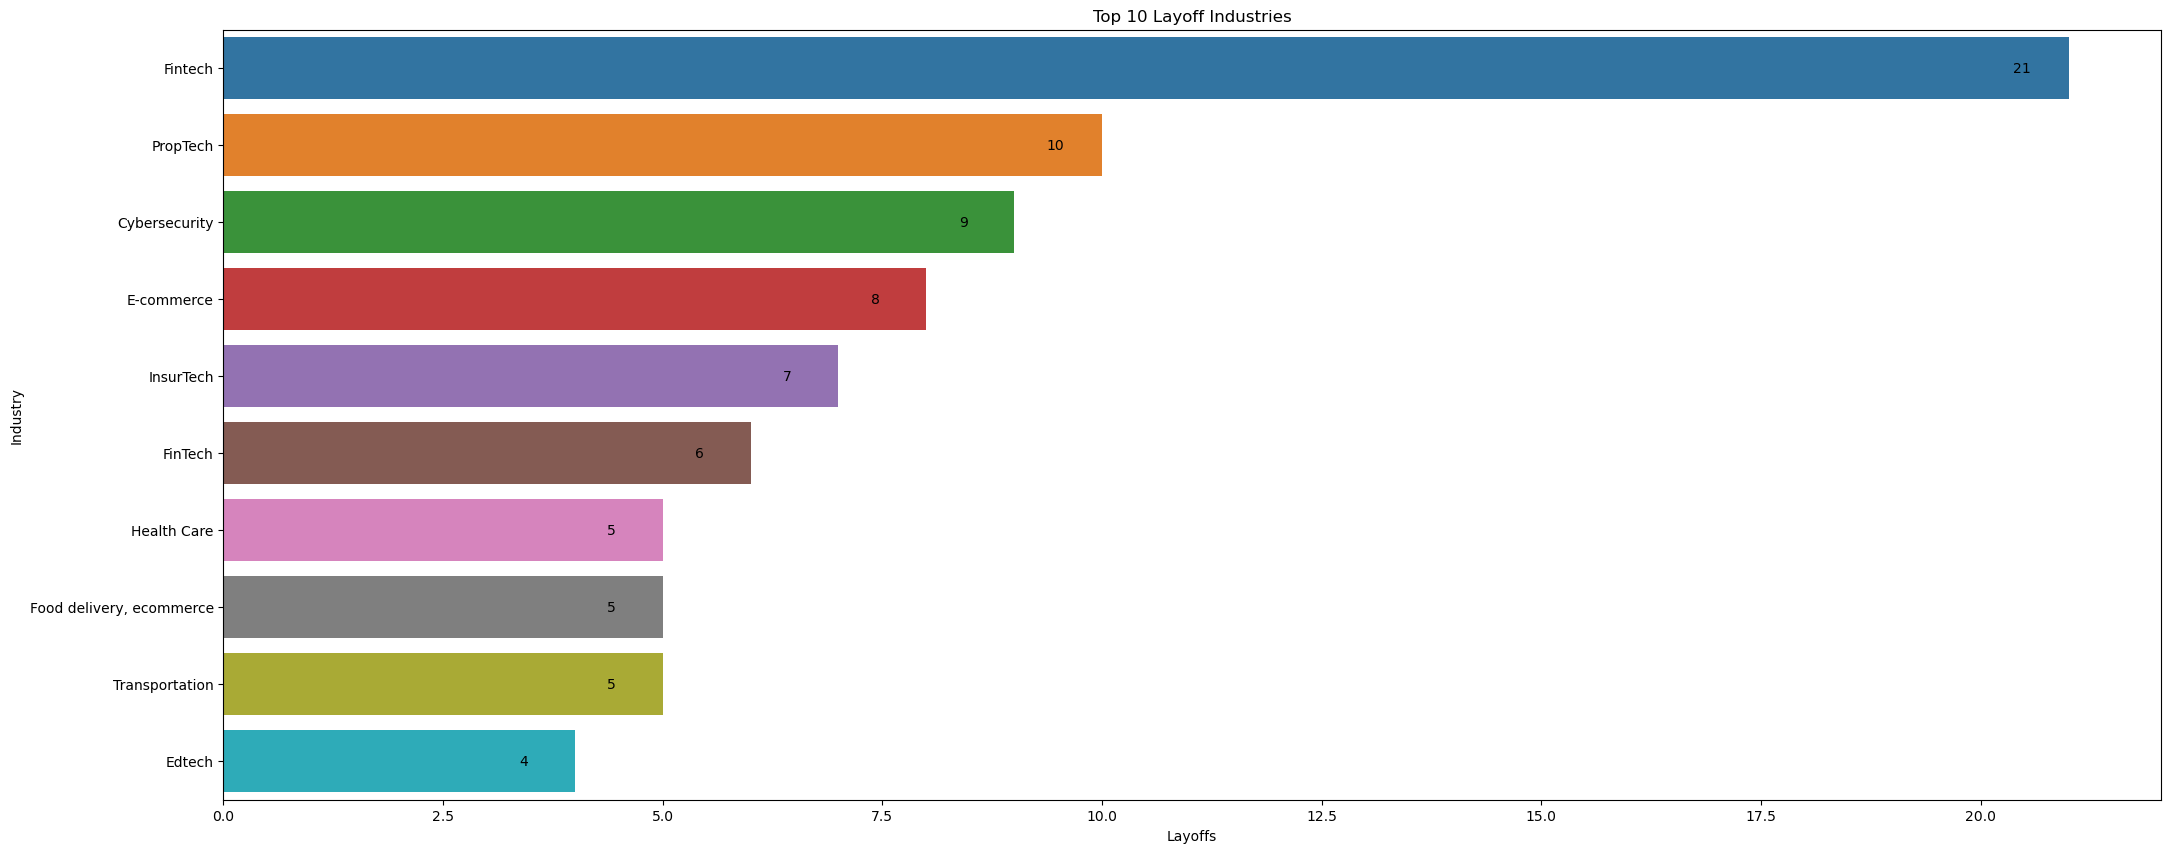

In [32]:
fig, ax = plt.subplots(figsize=(25, 10))
top_10_industries = df['industry'].value_counts().head(10)
top_10_industries = df.groupby('industry').size().sort_values(ascending=False).head(10)
top_10_industries = top_10_industries.to_frame().reset_index()
p=sns.barplot(y='industry',x=0, data=top_10_industries,ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-40)
plt.title("Top 10 Layoff Industries")
plt.xlabel('Layoffs')
plt.ylabel('Industry')
plt.show()

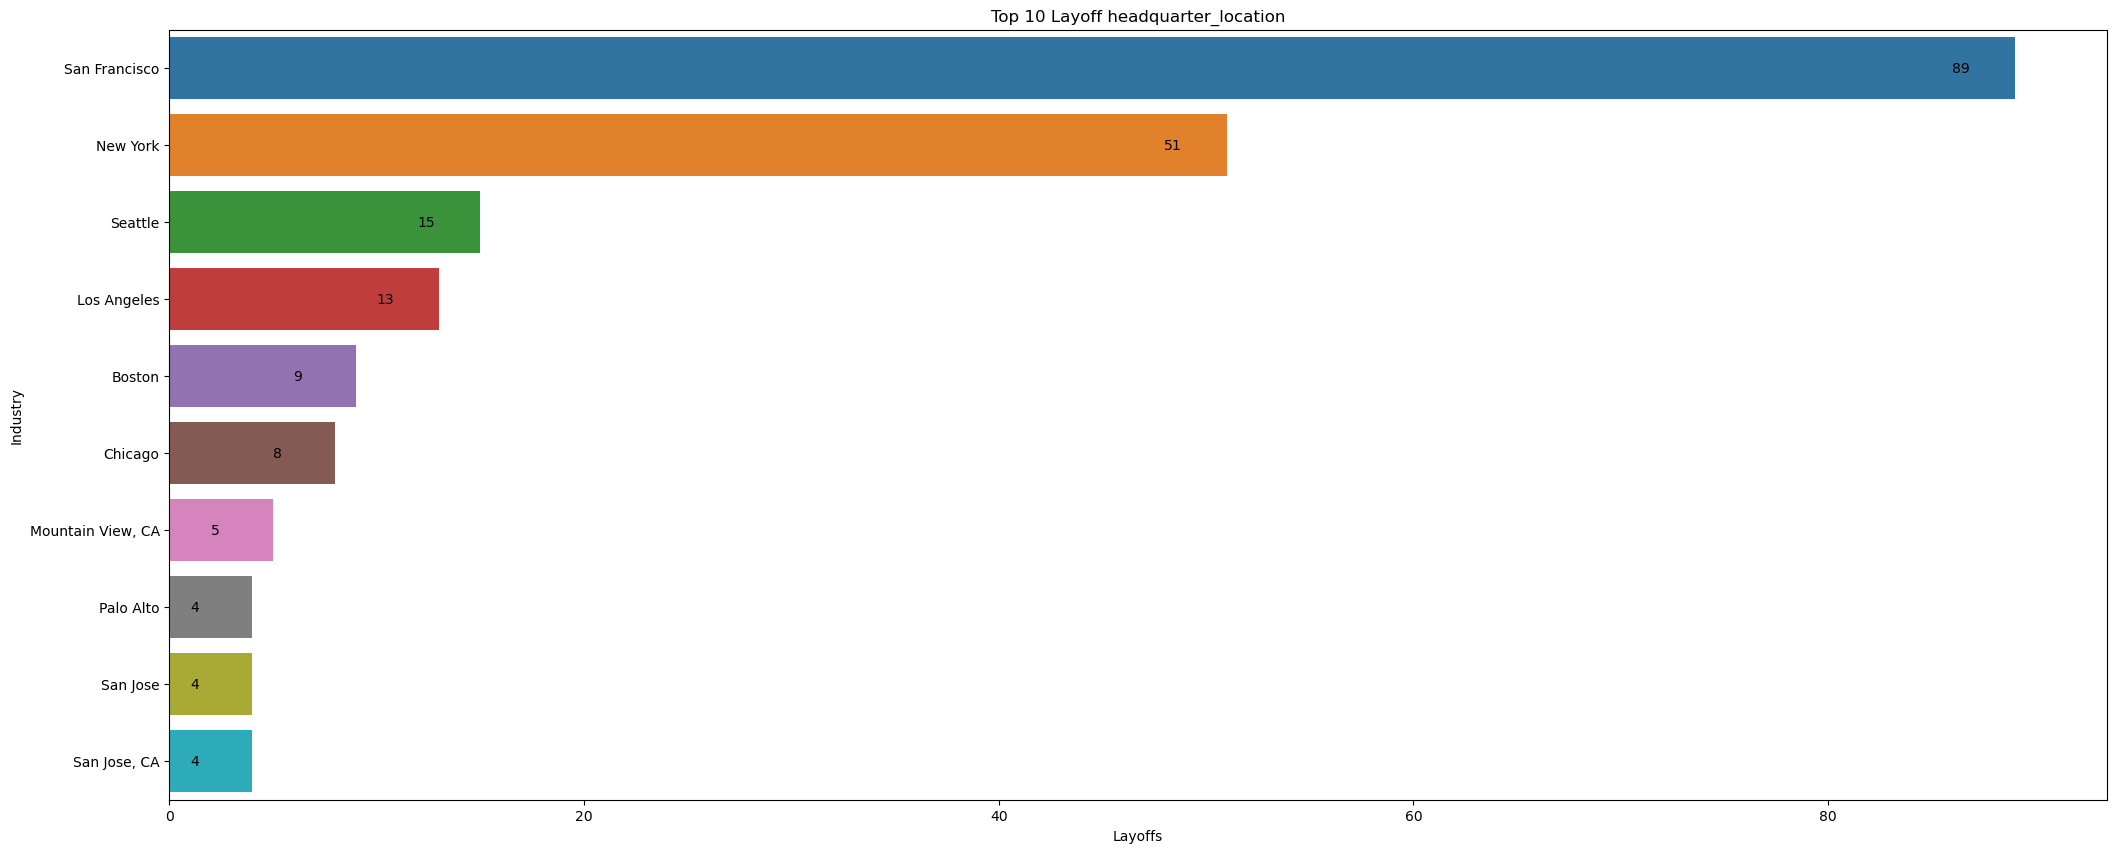

In [33]:
fig, ax = plt.subplots(figsize=(25, 10))
top_10_industries = df['headquarter_location'].value_counts().head(10)
top_10_industries = df.groupby('headquarter_location').size().sort_values(ascending=False).head(10)
top_10_industries = top_10_industries.to_frame().reset_index()
p=sns.barplot(y='headquarter_location',x=0, data=top_10_industries,ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-45)
plt.title("Top 10 Layoff headquarter_location")
plt.xlabel('Layoffs')
plt.ylabel('Industry')
plt.show()

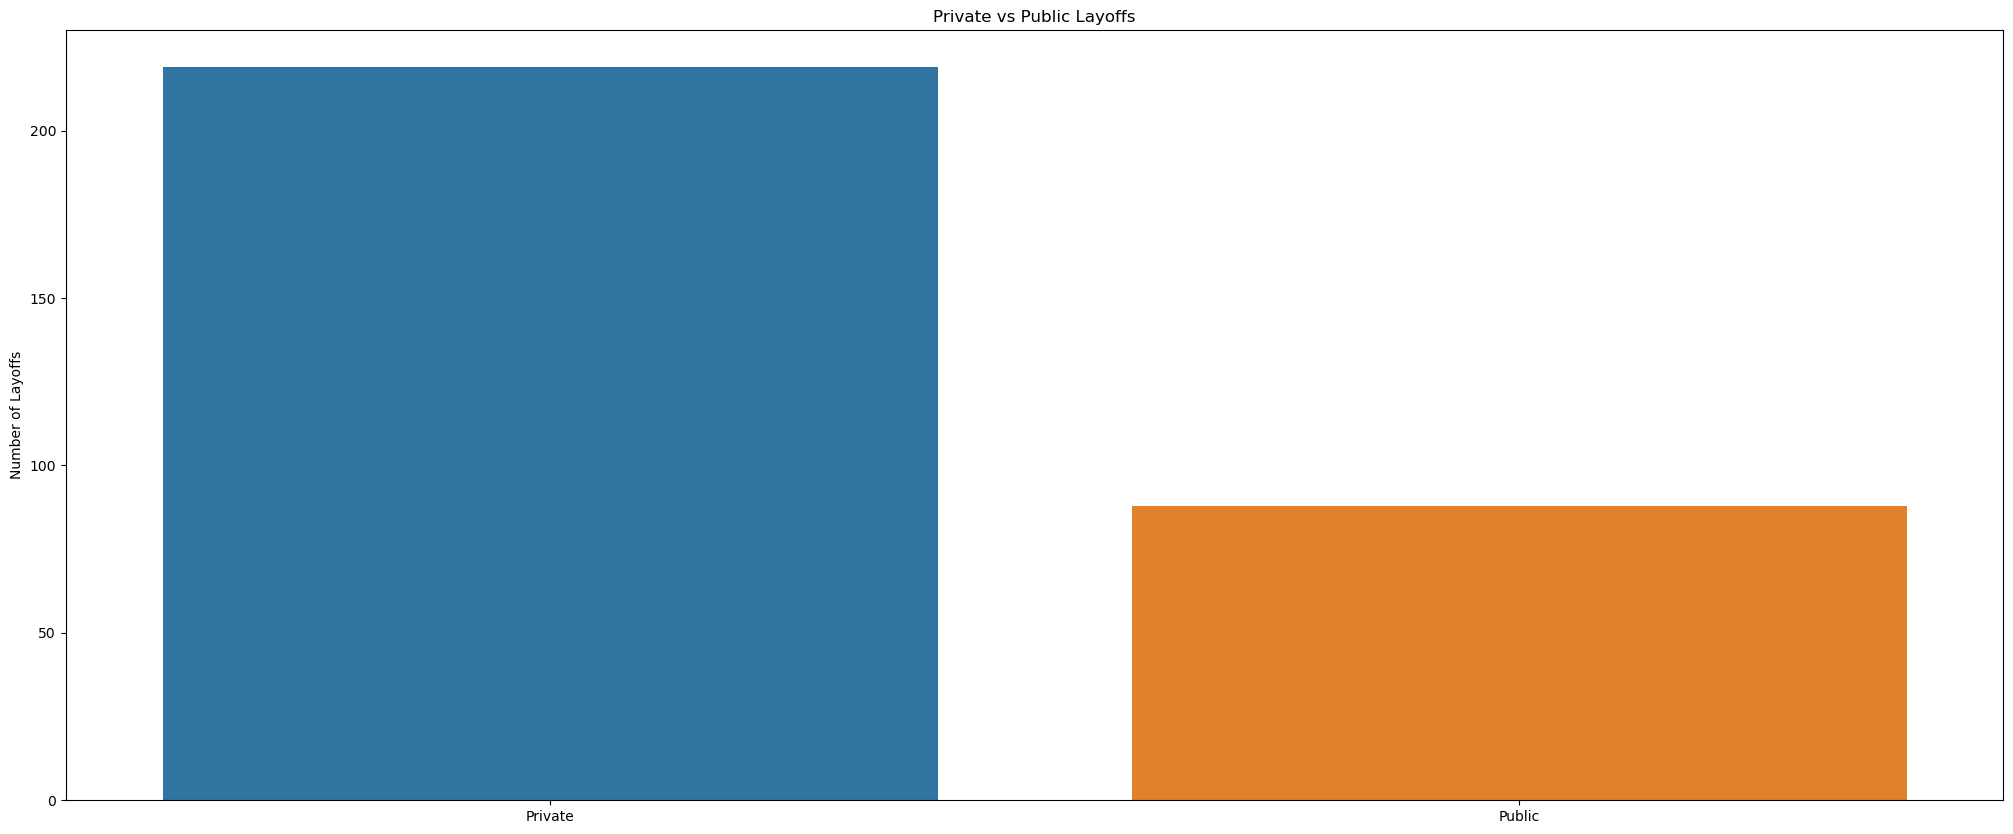

In [35]:
fig, ax = plt.subplots(figsize=(25, 10))
p=sns.countplot(x="status",  data=df,
              ax=ax)
#for container in p.containers:
 #   p.bar_label(container, padding=-40)
plt.title("Private vs Public Layoffs")
plt.xlabel('')
plt.ylabel('Number of Layoffs')
plt.show()

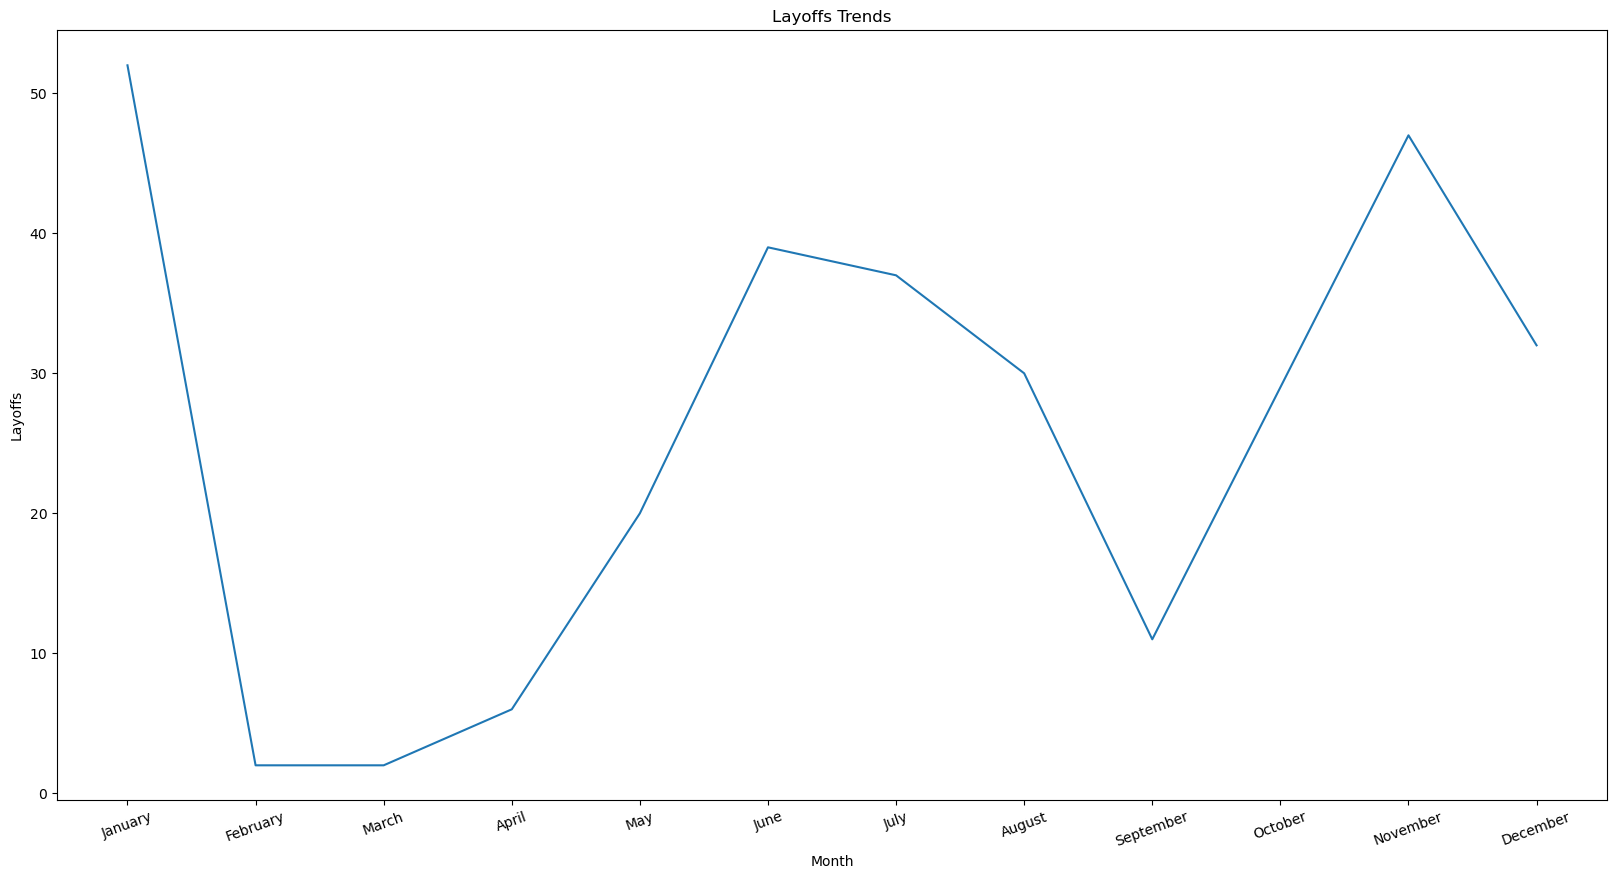

In [37]:
import calendar

plt.figure(figsize=(20,10))

# group the data by month and player and calculate the total feature
gg = df.groupby(["Month"])["total_layoffs"].count()
gg = gg.reset_index()

#create a line chart using Seaborn
sns.lineplot(x="Month", y="total_layoffs", data=gg)

# add a title and axis labels
plt.title("Layoffs Trends")
plt.xlabel("Month")
plt.ylabel("Layoffs")

# set the x-tick labels as the names of the months
plt.xticks(range(1,13), [calendar.month_name[i] for i in range(1,13)], rotation=20)

# show the plot
plt.show()

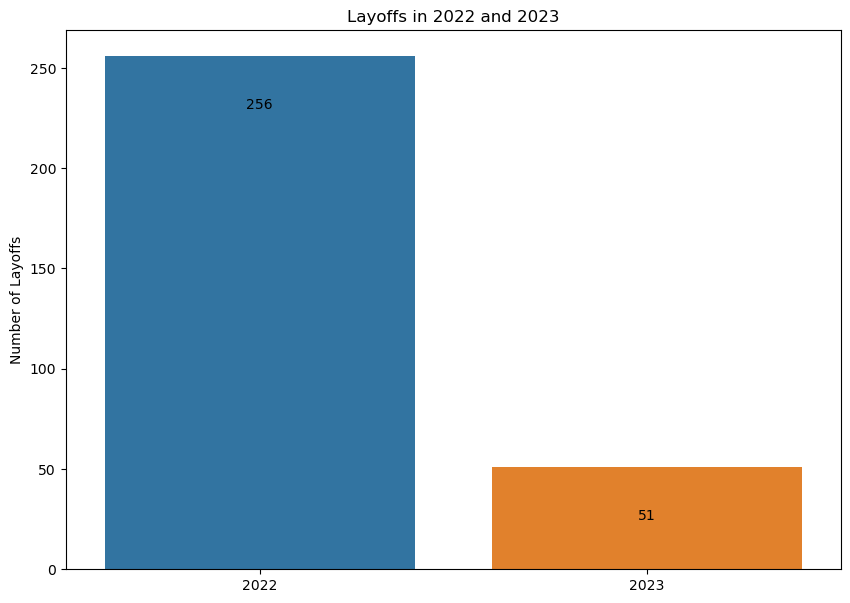

In [39]:
fig, ax = plt.subplots(figsize=(10, 7))
p=sns.countplot(x="Year",  data=df,
              ax=ax)
for container in p.containers:
    p.bar_label(container, padding=-40)
plt.title("Layoffs in 2022 and 2023")
plt.xlabel('')
plt.ylabel('Number of Layoffs')
plt.show()